## Summer Analytics 2023
# Capstone project

In [263]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
# import datasets
train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')

In [265]:
# print the first 5 rows
train.head()

,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma,pred
0,y,83.71,63.0,7.2,52.5,14.0232,130.8300,12.4280,188.8425,8.9520,201.1905,9.2896,141.9075,16.0968,150.3390,12.4880,173.1240,m78,0
1,y,108.94,31.5,12.8,84.0,13.2840,128.8350,13.5256,183.0990,8.8520,207.2385,8.4704,154.7805,13.3304,101.0205,12.5096,131.4075,m78,0
2,E,169.65,0.0,5.6,73.5,14.5472,128.9295,13.6424,174.4680,8.9800,190.3125,11.3056,156.7650,NaN,122.5350,11.7136,176.8200,m76,1
3,x,122.42,31.5,7.2,63.0,15.0152,119.8575,12.3344,186.8580,10.7208,193.8195,10.6096,175.7490,NaN,124.8030,13.8424,168.2625,m55,0
4,E,125.43,94.5,7.2,42.0,14.4176,135.4290,14.5824,187.8135,9.3088,203.1540,9.8280,172.7040,14.4720,120.2145,NaN,150.1185,m76,0


In [266]:
train['ld'].value_counts()

99.62     10
128.33     9
101.59     9
107.06     9
101.18     9
          ..
233.72     1
144.84     1
171.32     1
208.43     1
216.26     1
Name: ld, Length: 11145, dtype: int64

In [267]:
# print the first 5 rows
test.head()

,index,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma
0,0,E,156.46,73.5,8.8,105.0,13.2768,113.5365,13.9552,168.5460,8.5896,187.6560,8.3472,178.5945,14.3192,138.0435,12.7008,166.1100,m76
1,1,y,58.87,84.0,12.8,42.0,14.4440,126.6930,13.6688,190.6275,10.1712,202.5870,8.5416,166.9815,15.5944,142.5690,11.6832,177.7230,m78
2,2,w,139.68,126.0,3.2,73.5,14.2432,107.4885,13.8544,168.3255,10.2504,214.2735,11.3392,155.1795,16.0256,132.1005,13.0104,185.6085,m78
3,3,z,194.06,52.5,6.4,105.0,14.5480,138.6105,13.5080,196.6545,10.6304,213.4650,9.9224,191.1000,14.8256,128.0475,12.1984,180.2745,m75
4,4,x,173.14,42.0,8.0,136.5,14.9496,103.8765,13.8936,168.3570,9.6184,191.2050,9.9400,185.0310,13.8664,124.7610,NaN,157.6470,m55


In [268]:
# drop additional column in test dataset
test.drop('index', axis=1, inplace=True)

In [269]:
# print the info of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22584 entries, 0 to 22583
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc      22584 non-null  object 
 1   ld      22362 non-null  float64
 2   m0      22584 non-null  float64
 3   m1      22584 non-null  float64
 4   m2      22584 non-null  float64
 5   m3      22270 non-null  float64
 6   m4      22117 non-null  float64
 7   m5      22008 non-null  float64
 8   m6      21909 non-null  float64
 9   m7      21796 non-null  float64
 10  m8      21684 non-null  float64
 11  m9      21537 non-null  float64
 12  m10     21484 non-null  float64
 13  m11     21357 non-null  float64
 14  m12     21203 non-null  float64
 15  m13     21085 non-null  float64
 16  m14     20995 non-null  float64
 17  ma      22584 non-null  object 
 18  pred    22584 non-null  int64  
dtypes: float64(16), int64(1), object(2)
memory usage: 3.3+ MB


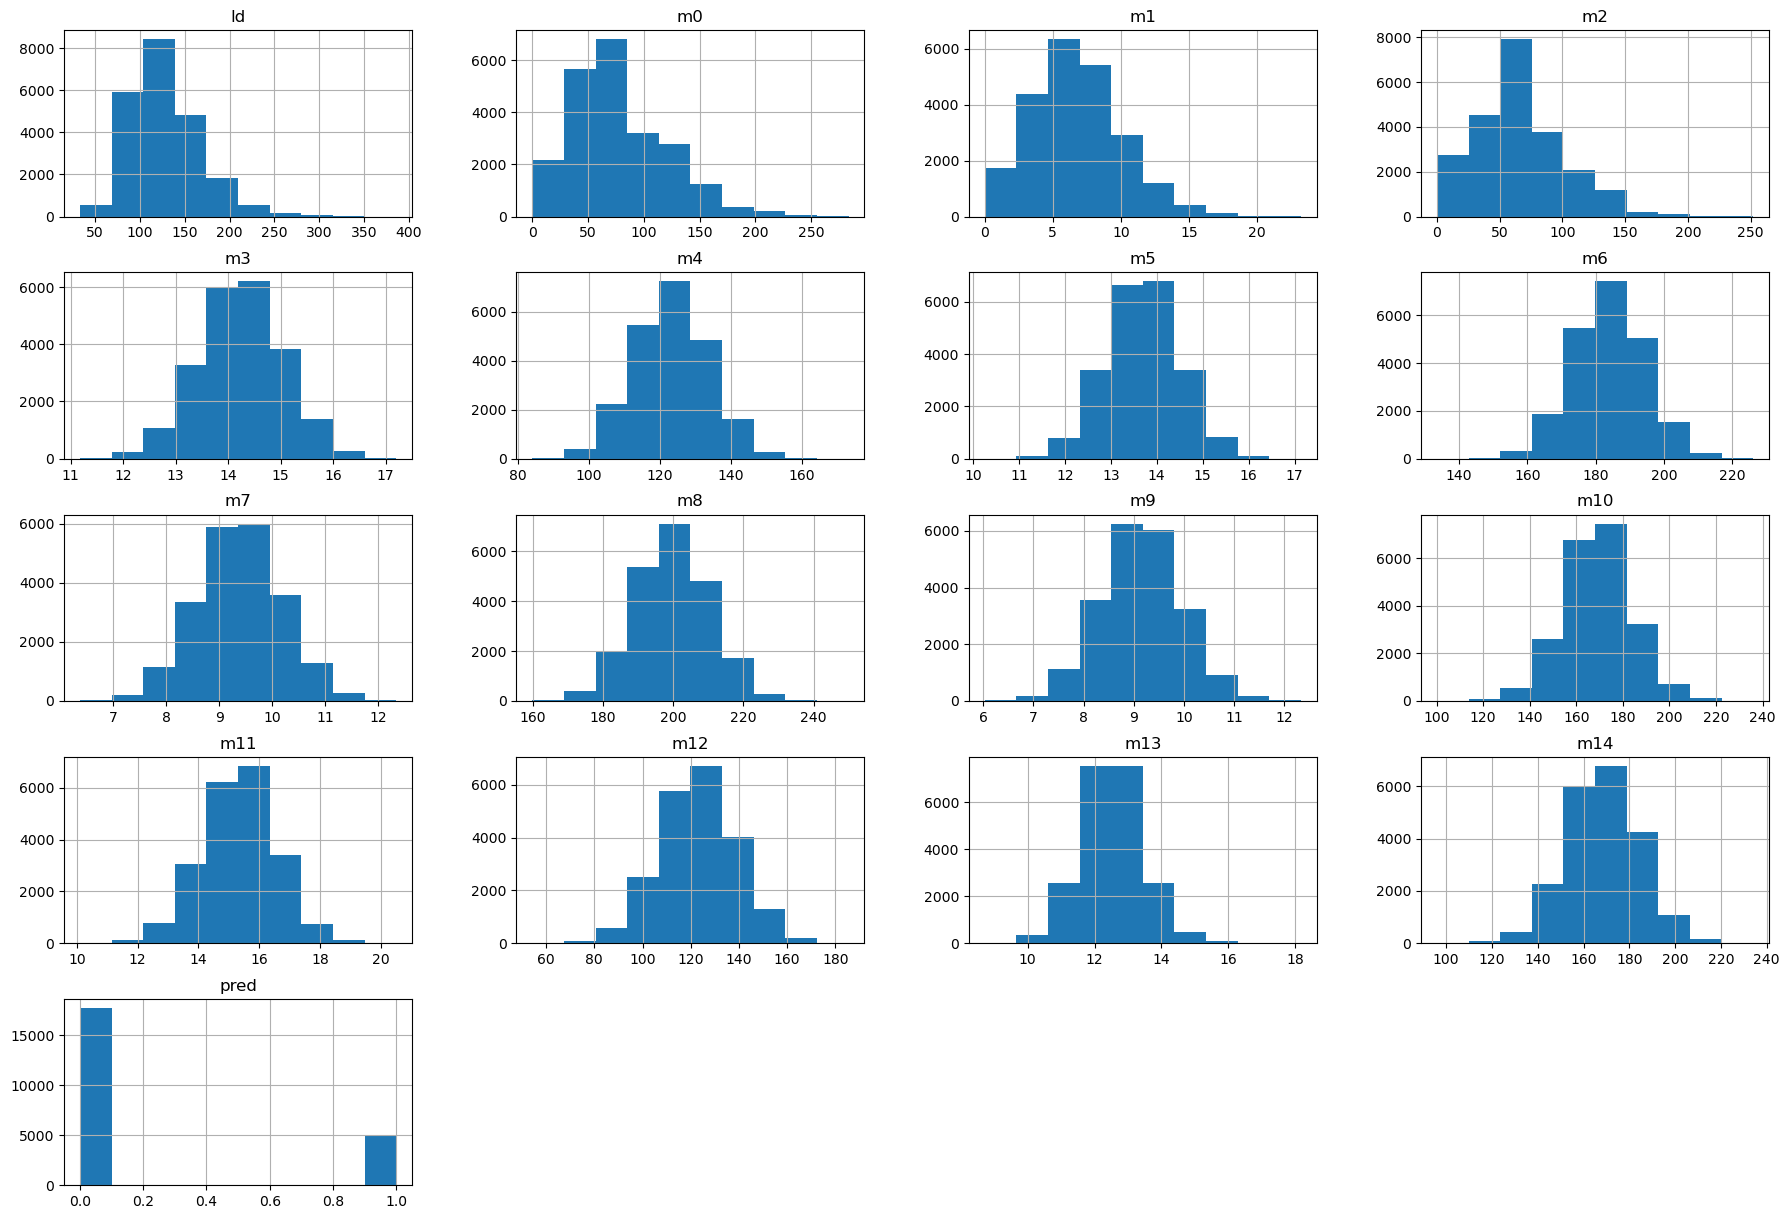

In [270]:
# Plotting histograms
train.hist(train.columns, figsize=(22, 15));

C:\Users\shrig\AppData\Local\Temp\ipykernel_16956\81551245.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap="RdBu_r", annot=True)


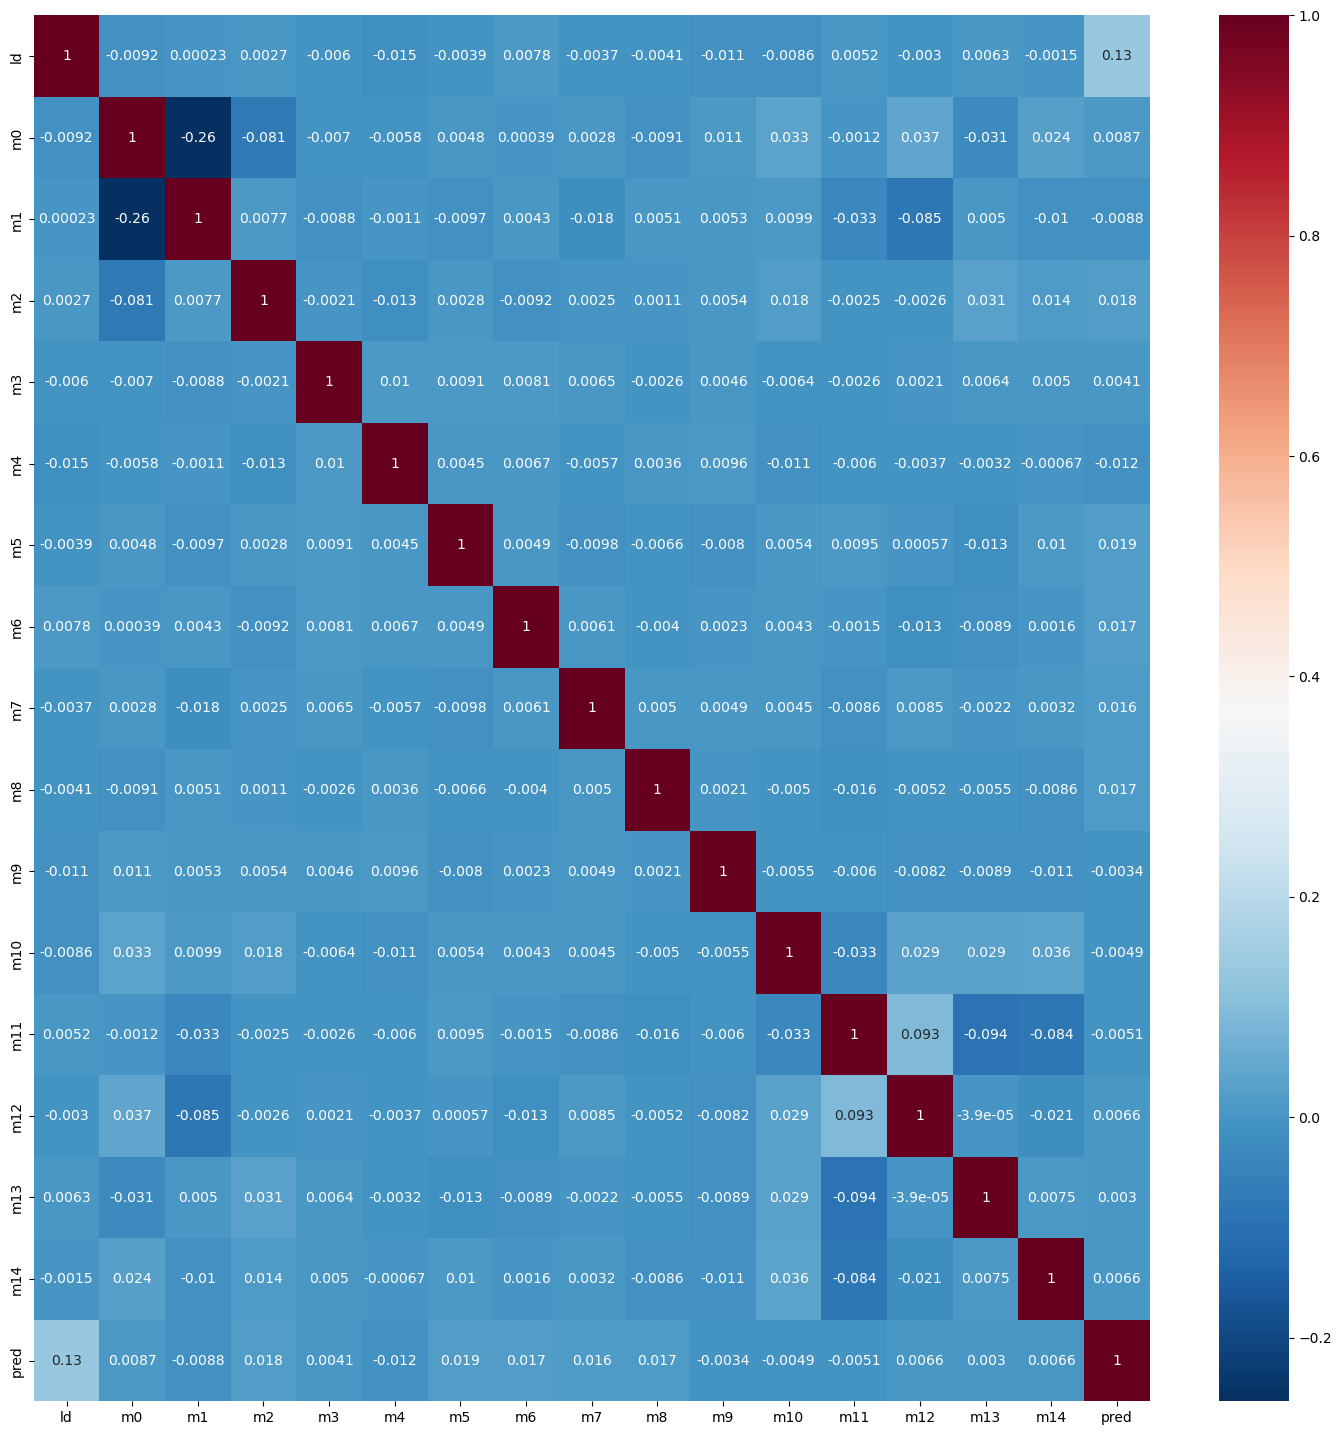

In [271]:
# Create a heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(train.corr(), cmap="RdBu_r", annot=True)
plt.show()

In [272]:
# print null values
train.isnull().sum()

pc         0
ld       222
m0         0
m1         0
m2         0
m3       314
m4       467
m5       576
m6       675
m7       788
m8       900
m9      1047
m10     1100
m11     1227
m12     1381
m13     1499
m14     1589
ma         0
pred       0
dtype: int64

In [273]:
# Checking categories in object columns so that they can be converted to numerical
print(train['pc'].value_counts())
print(train['ma'].value_counts())

y    4915
E    4509
x    4414
z    4394
w    4352
Name: pc, dtype: int64
m78    9267
m76    4509
m55    4414
m75    4394
Name: ma, dtype: int64


In [274]:
# convert the pc, ma column to numerical data using sklearn's LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['pc'] = le.fit_transform(train['pc'])
train['ma'] = le.fit_transform(train['ma'])


In [275]:
# replace null values in dataset with average values using sklearn's SimpleImputer
from sklearn.impute import SimpleImputer

null_col = ['ld', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14']

# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the DataFrame and transform it
imputed_data = imputer.fit_transform(train[null_col])

# Convert the result back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=train[null_col].columns)

# Add the remaining columns of the original DataFrame that did not contain missing values
imputed_df = pd.concat([imputed_df, train.drop(null_col, axis=1)], axis=1)

# Rearrange the columns to match the order of the original DataFrame
imputed_df = imputed_df[train.columns]


In [276]:
# print the info of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc      3986 non-null   object 
 1   ld      3958 non-null   float64
 2   m0      3986 non-null   float64
 3   m1      3986 non-null   float64
 4   m2      3986 non-null   float64
 5   m3      3919 non-null   float64
 6   m4      3915 non-null   float64
 7   m5      3886 non-null   float64
 8   m6      3865 non-null   float64
 9   m7      3837 non-null   float64
 10  m8      3838 non-null   float64
 11  m9      3806 non-null   float64
 12  m10     3786 non-null   float64
 13  m11     3745 non-null   float64
 14  m12     3766 non-null   float64
 15  m13     3711 non-null   float64
 16  m14     3701 non-null   float64
 17  ma      3986 non-null   object 
dtypes: float64(16), object(2)
memory usage: 560.7+ KB


In [277]:
# print null values of test dataset
test.isnull().sum()

pc       0
ld      28
m0       0
m1       0
m2       0
m3      67
m4      71
m5     100
m6     121
m7     149
m8     148
m9     180
m10    200
m11    241
m12    220
m13    275
m14    285
ma       0
dtype: int64

In [278]:
# convert the pc, ma column to numerical data using sklearn's LabelEncoder
test['pc'] = le.fit_transform(test['pc'])
test['ma'] = le.fit_transform(test['ma'])

In [279]:
# replace null values in dataset with average values using sklearn's SimpleImputer

# Fit the imputer on the DataFrame and transform it
imputed_test_data = imputer.fit_transform(test[null_col])

# Convert the result back to a DataFrame
imputed_test_df = pd.DataFrame(imputed_test_data, columns=test[null_col].columns)

# Add the remaining columns of the original DataFrame that did not contain missing values
imputed_test_df = pd.concat([imputed_test_df, test.drop(null_col, axis=1)], axis=1)

# Rearrange the columns to match the order of the original DataFrame
imputed_test_df = imputed_test_df[test.columns]
X_test=imputed_test_df

In [280]:
# seperate the target variable
y_train=imputed_df['pred']
X_train=imputed_df.drop(['pred'], axis=1)

In [281]:
# # create an instance of QuantileTransformer
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=10, random_state=0)  

# # fit and transform the selected columns of train and test
xtrain = scaler.fit_transform(X_train)
test = scaler.transform(X_test)

In [282]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer() # standardize=False

# # fit and transform the selected columns of train and test
xtrain = scaler.fit_transform(X_train)
test = scaler.transform(X_test)

In [283]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# Create a DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeClassifier(max_features='auto')

# Create an AdaBoostClassifier with the DecisionTreeClassifier as the base estimator
ada = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=30,
    learning_rate=0.1)

# Fit the AdaBoostClassifier on the training data
ada.fit(X_train, y_train)

# Make predictions on the test data
y_pred1 = ada.predict(X_test)


c:\Users\shrig\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [284]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ada, X_train, y_train, cv=10, scoring='f1')
print("Cross-validation scores:", score)
print("Mean cross-validation score:", score.mean())


c:\Users\shrig\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\shrig\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\shrig\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\shrig\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\shrig\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.

Cross-validation scores: [0.24814422 0.25294118 0.24928639 0.24016145 0.2487361  0.24827586
 0.23005181 0.24007744 0.24409449 0.22574257]
Mean cross-validation score: 0.24275115234229877


c:\Users\shrig\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [285]:
# fitting the same model
y_pred = y_pred1 #.astype(bool)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [286]:
submission = pd.DataFrame(columns=['pred'])
submission["pred"] = [i for i in y_pred]
submission.to_csv("submission.csv", index=False)
submission

,pred
0,0
1,0
2,1
3,0
4,1
...,...
3981,0
3982,0
3983,1
3984,0


In [287]:
submission.value_counts()

pred
0       3110
1        876
dtype: int64